In [1]:
import polars as pl

In [2]:
!ls ../kkdata

light_test_source_labels.csv
light_train_source_labels.csv
light_train_target_labels.csv
sample.csv
test_source_events.csv
train_source_events.csv
train_target_events.csv


In [3]:
!ls ../kkdata2

light_test_source_labels.csv
light_train_source_labels.csv
light_train_target_labels.csv
sample.csv
test_source_events.csv
train_source_events.csv
train_target_events.csv


In [4]:
df_source = pl.read_csv("../kkdata/train_source_events.csv")
df_target = pl.read_csv("../kkdata/train_target_events.csv")

In [5]:
df_source

user_id,device_id,session_id,title_id,event_time,played_duration,action_trigger,platform,title_in_simulcast,internet_connection_type
i64,i64,i64,i64,f64,i64,i64,i64,i64,i64
0,525,2328,384,1.6489e9,1361,1,0,0,1
0,525,2328,384,1.6489e9,2,0,0,0,1
0,525,2400,68,1.6490e9,2,0,0,0,1
0,525,2400,68,1.6490e9,20,9,0,0,1
0,532,2401,68,1.6490e9,8,10,2,1,4
0,532,2401,68,1.6490e9,19,10,2,1,4
0,532,2403,68,1.6490e9,2432,10,2,1,4
0,532,2403,68,1.6490e9,297,1,2,1,4
0,532,2403,68,1.6490e9,4,10,2,1,4


In [6]:
df_source.shape

(9714103, 10)

In [7]:
df_target.shape

(374170, 10)

In [8]:
df_source.columns

['user_id',
 'device_id',
 'session_id',
 'title_id',
 'event_time',
 'played_duration',
 'action_trigger',
 'platform',
 'title_in_simulcast',
 'internet_connection_type']

### How many unique user id?

In [9]:
len(set(df_source['user_id']))

30460

In [10]:
df_source['user_id'].unique().shape

(30460,)

### How many total play time?

In [11]:
df_source['played_duration'].sum()

9346722696

### Time interval?

In [12]:
df_source['event_time'].min()

1640998801.205

In [13]:
df_source['event_time'].max()

1663376398.588

In [14]:
df_source['event_time'].describe()

statistic,value
str,f64
"""count""",9.714103e6
"""null_count""",0.0
"""mean""",1.6526e9
"""std""",6.7707e6
"""min""",1.6410e9
"""25%""",1.6462e9
"""50%""",1.6535e9
"""75%""",1.6586e9
"""max""",1.6634e9


### How many event per user?

In [15]:
df_source.group_by('user_id').count().sort(by='count')

user_id,count
i64,u32
16304,1
20800,1
12144,1
26769,1
19617,1
13361,1
6737,1
22545,1
14482,1


In [16]:
# total time by user
df_source[['user_id', 'played_duration']].group_by('user_id').sum().sort('played_duration')

user_id,played_duration
i64,i64
12144,1
18979,1
27079,2
18397,2
27634,3
25240,3
14803,4
15717,4
11003,4


In [17]:
source_total = df_source[['user_id', 'played_duration']].group_by('user_id').sum()
target_total = df_target[['user_id', 'played_duration']].group_by('user_id').sum()

In [18]:
df_total = source_total.join(target_total, on='user_id')
df_total

user_id,played_duration,played_duration_right
i64,i64,i64
848,197275,2718
10688,826072,18073
18784,472095,21975
8736,230904,2673
23264,136463,2403
27792,258820,7938
26000,171362,476
23616,35107,2701
29232,472288,13769


In [19]:
%matplotlib inline

In [20]:
import matplotlib.pyplot as plt

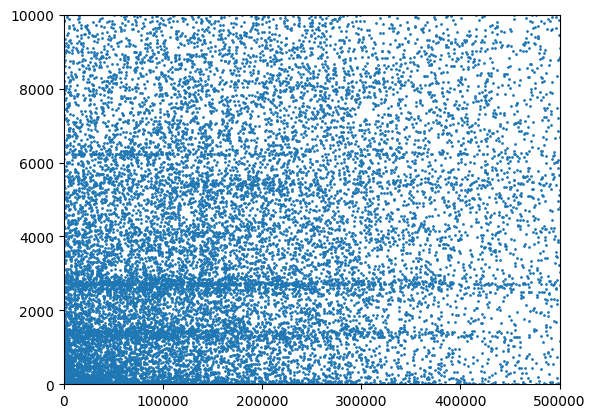

In [21]:
plt.xlim(0, 500000)
plt.ylim(0, 10000)
plt.scatter(df_total['played_duration'], df_total['played_duration_right'], s=1)

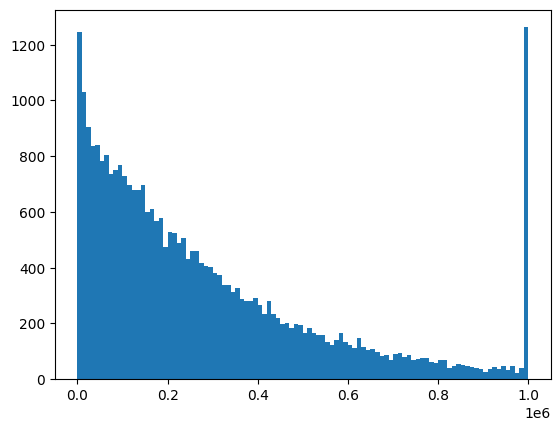

In [22]:
plt.hist(df_total['played_duration'].clip(0, 1000000), bins=100);

In [23]:
df_total.describe([0.05, 0.5, 0.95])

describe,user_id,played_duration,played_duration_right
str,f64,f64,f64
"""count""",30460.0,30460.0,30460.0
"""null_count""",0.0,0.0,0.0
"""mean""",15229.5,306852.353775,12065.788247
"""std""",8793.188936,379116.98106,18612.75255
"""min""",0.0,1.0,1.0
"""5%""",1523.0,12544.0,85.0
"""50%""",15230.0,204118.0,6148.0
"""95%""",28937.0,921558.0,43682.0
"""max""",30459.0,1.1995926e7,486812.0


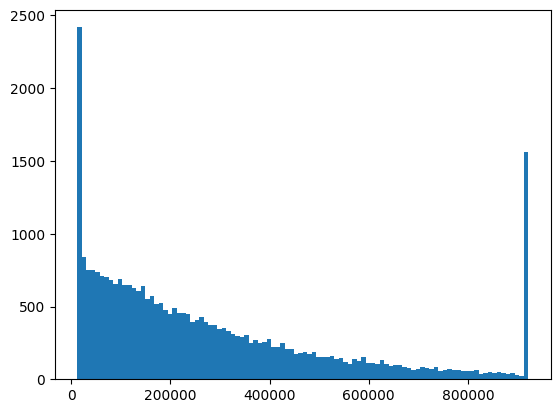

In [24]:
plt.hist(df_total['played_duration'].clip(12544,921558), bins=100);

In [25]:
(df_total['played_duration']/3600).round()

played_duration
f64
55.0
229.0
131.0
64.0
38.0
72.0
48.0
10.0
131.0


In [26]:
#df_total['played_duration_hour'] = (df_total['played_duration']/3600).round()
df_total = df_total.with_columns( played_hour = (df_total['played_duration']/3600).round())
df_total

user_id,played_duration,played_duration_right,played_hour
i64,i64,i64,f64
848,197275,2718,55.0
10688,826072,18073,229.0
18784,472095,21975,131.0
8736,230904,2673,64.0
23264,136463,2403,38.0
27792,258820,7938,72.0
26000,171362,476,48.0
23616,35107,2701,10.0
29232,472288,13769,131.0


In [27]:
df_total_gb = df_total[['played_duration_right', 'played_hour']].group_by('played_hour').mean().sort('played_hour')
df_total_gb

played_hour,played_duration_right
f64,f64
0.0,7124.806667
1.0,5906.935065
2.0,7063.103535
3.0,6752.316216
4.0,6043.69086
5.0,6334.935754
6.0,6131.73817
7.0,5983.666667
8.0,6722.218354


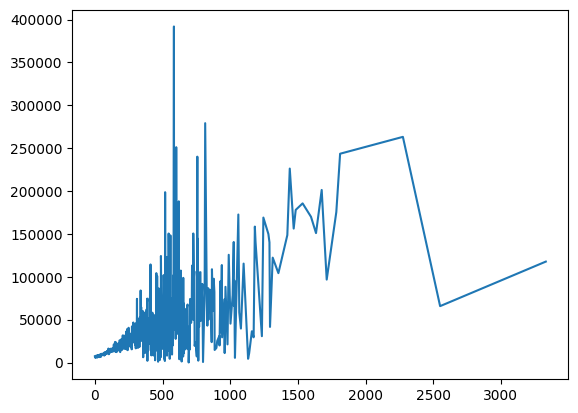

In [28]:
plt.plot(df_total_gb['played_hour'], df_total_gb['played_duration_right'])

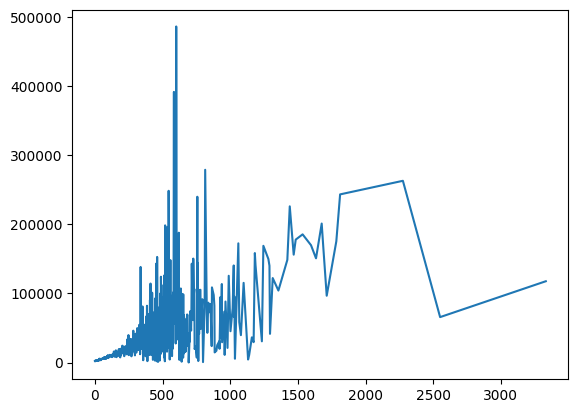

In [29]:
df_total_gb = df_total[['played_duration_right', 'played_hour']].group_by('played_hour').quantile(0.5).sort('played_hour')
plt.plot(df_total_gb['played_hour'], df_total_gb['played_duration_right'])

In [30]:
source_count = df_source.group_by('user_id').count()
target_count = df_target.group_by('user_id').count()
df_count = source_count.join(target_count, on='user_id')
df_count

user_id,count,count_right
i64,u32,u32
20704,462,3
5856,499,29
18720,463,14
18784,510,26
10240,162,3
24528,252,2
21456,811,16
8496,78,4
976,284,5


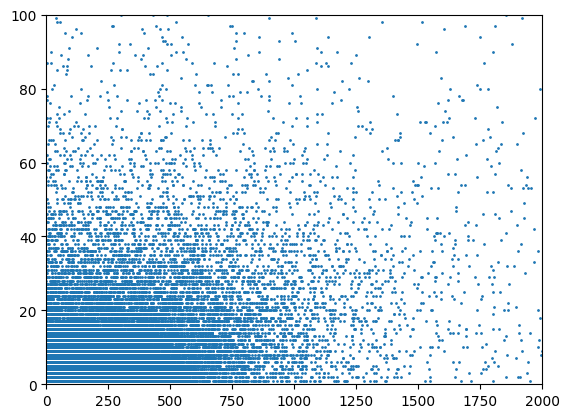

In [31]:
plt.xlim(0, 2000)
plt.ylim(0, 100)
plt.scatter(df_count['count'], df_count['count_right'], s=1)

### Similarity between users
#### How to represent a user?

In [36]:
df_source.columns

['user_id',
 'device_id',
 'session_id',
 'title_id',
 'event_time',
 'played_duration',
 'action_trigger',
 'platform',
 'title_in_simulcast',
 'internet_connection_type']

In [67]:
group_by_key = ["user_id", "title_id"]
df_ = df_source[group_by_key+["played_duration"]].sort(by='title_id').group_by(["user_id", "title_id"]).sum()
df_

user_id,title_id,played_duration
i64,i64,i64
0,0,30201
745,0,37747
934,0,27006
1231,0,27292
1246,0,10835
1543,0,25840
1655,0,24051
1845,0,19852
2144,0,10207


In [68]:
df_ = df_.pivot(values="played_duration", index="user_id", columns="title_id").fill_null(0)
df_

user_id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,…,5082,5336,5356,5418,5459,5534,5538,5608,5637,5666,5769,5824,5870,5873,5894,5897,5960,5997,6052,6080,2245,2521,3282,4832,4940,5002,5120,5169,5540,5660,5664,5670,5675,6034,6050,6063,6094
i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,…,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
0,30201,0,0,0,56004,24669,2811,503,0,0,0,6921,2645,0,12280,0,5001,0,0,0,0,25072,0,0,0,0,0,70296,49567,60,0,0,0,0,0,0,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
745,37747,0,5268,0,0,0,0,0,0,0,0,0,0,0,0,0,7180,0,0,0,0,0,0,4159,0,0,0,36711,0,0,0,0,0,0,0,0,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
934,27006,0,0,34781,0,0,28814,15611,0,0,17,3623,0,0,0,0,0,0,0,0,0,0,3310,0,0,0,0,0,40814,7029,0,0,35675,0,0,0,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1231,27292,0,0,17184,0,20739,0,24677,623,69756,0,0,0,0,21249,0,0,0,0,0,0,0,0,3695,916,0,0,37247,0,0,0,0,0,0,0,0,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1246,10835,0,0,2955,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1543,25840,1346,22722,0,0,0,0,0,0,0,0,0,0,0,0,0,1525,0,0,0,0,0,182,0,0,0,0,0,0,0,0,0,0,0,0,421,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1655,24051,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1845,19852,0,166,19621,8812,6529,0,15393,0,0,0,14827,0,0,13956,0,0,11097,0,0,0,0,0,12465,179,35,32,0,0,0,0,0,0,0,0,0,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2144,10207,2480,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5338,0,0,0,0,0,12,0,0,0,0,0,1002,0,0,0,0,21840,0,0,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [77]:
A = df_[df_.columns[1:]].to_numpy()
A

array([[30201,     0,     0, ...,     0,     0,     0],
       [37747,     0,  5268, ...,     0,     0,     0],
       [27006,     0,     0, ...,     0,     0,     0],
       ...,
       [    0,     0,     0, ...,     0,     0,     0],
       [    0,     0,     0, ...,     0,     0,     0],
       [    0,     0,     0, ...,     0,     0,     0]], dtype=int64)

In [81]:
import numpy as np
A = A / np.linalg.norm(A, axis=1, keepdims=True)
A

array([[0.15549228, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.35745349, 0.        , 0.04988648, ..., 0.        , 0.        ,
        0.        ],
       [0.12096315, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [92]:
D = A[:100] @ A.T

In [93]:
np.fill_diagonal(D, 0)
D.argmax(axis=1)

array([25049, 15029, 21993, 14755, 25087, 24354, 10770,  7107,  8446,
       30222, 20215, 29932, 29315, 27226,  8329, 19542, 14704, 23216,
       26792, 14080,  9016,  4073, 23637,  5602, 16102,  1949, 19138,
        5006,  9590, 13042, 20685, 10793,  1931, 12208, 10308, 29786,
        7811, 13264, 17670, 30352,  4024, 12044, 17065,  6255, 20642,
       12341,  2526, 11659,  9065, 14583,  9322,  1018, 18095, 26385,
       18200,  6506, 13874, 29970, 25420,    64,  4913,  3519,  9342,
         702, 30012, 25052,  9261, 14755,  3889,  3393, 14315, 10575,
       26714,  4248, 11570,   230, 22000,  1743,  3979, 27646, 22927,
       12192, 25036, 25776,  1051,  1587,   698, 30332,   714, 28609,
        7871, 17270, 17380,  9664,  7341, 20516, 26134,    64,  9799,
       27569], dtype=int64)

In [110]:
D.max(axis=1)

array([0.47600806, 0.63175413, 0.60488302, 0.76117412, 0.61921438,
       0.6283855 , 0.54771074, 0.53818267, 0.47409467, 0.83172292,
       0.8206171 , 0.7070906 , 0.63214307, 0.74535796, 0.54463373,
       0.53178832, 0.65693157, 0.73791936, 0.79481677, 0.53849469,
       0.59391023, 0.57414345, 0.65873015, 0.60441887, 0.63014982,
       0.50210197, 0.49311831, 0.89070613, 0.5919918 , 0.65105269,
       0.51923122, 0.74730956, 0.717219  , 0.63376365, 0.51825703,
       0.64830928, 0.53185564, 0.59380225, 0.49049958, 0.71763417,
       0.48799312, 0.71969355, 0.85355661, 0.87131562, 0.72959126,
       0.6097816 , 0.70259418, 0.72032063, 0.70695454, 0.80114549,
       0.56957796, 0.6539806 , 0.71288853, 0.73574168, 0.87223478,
       0.58233281, 0.65339352, 0.76823486, 0.558836  , 0.77055289,
       0.59459259, 0.89888665, 0.54431703, 0.60749494, 0.98608534,
       0.58839914, 0.71161227, 0.84291082, 0.98703226, 0.54271782,
       0.9692937 , 0.5787233 , 0.55781147, 0.72462613, 0.74542

In [119]:
X = A[15029]
print(X.argsort()[-20:])
print(X[X.argsort()[-10:]])

[452 208 119 294  36  63  28  11 215 403 182  64 171 178   2  37 266 165
  27  82]
[0.11338126 0.16723174 0.23294023 0.23809101 0.24271227 0.30959213
 0.31276924 0.33863544 0.37987374 0.52804279]


In [120]:
Y = A[1]
print(Y.argsort()[-20:])
print(Y[X.argsort()[-10:]])

[ 572  432  341  280  773  264  266 2171  178 2716  492  171  673  197
  165   82 1456   37   27    0]
[0.02175194 0.07807783 0.22210279 0.15143975 0.04988648 0.3109477
 0.1430117  0.24951763 0.34764286 0.27892111]


In [148]:
X = A[21993]
Y = A[2]
C = set(X.nonzero()[0]) & set(Y.nonzero()[0])
print(C)
set(X.argsort()[-20:]) & set(Y.argsort()[-20:]) & C

{3, 6, 28, 32, 163, 675, 37, 165, 294, 171, 299, 178, 64, 67, 206, 80, 337, 215, 228, 111, 1402}


{3, 6, 28, 32, 80, 165, 206, 1402}

In [143]:
set(Y.nonzero()[0])

{0,
 4,
 5,
 6,
 7,
 11,
 12,
 14,
 16,
 21,
 27,
 28,
 29,
 42,
 43,
 54,
 55,
 62,
 64,
 66,
 67,
 74,
 85,
 93,
 107,
 121,
 133,
 143,
 145,
 147,
 148,
 155,
 156,
 159,
 181,
 184,
 195,
 203,
 215,
 239,
 249,
 266,
 274,
 277,
 281,
 284,
 306,
 316,
 353,
 354,
 355,
 373,
 381,
 387,
 397,
 428,
 434,
 453,
 470,
 473,
 490,
 495,
 552,
 585,
 606,
 610,
 639,
 642,
 647,
 662,
 664,
 667,
 679,
 682,
 683,
 723,
 789,
 820,
 822,
 835,
 836,
 838,
 875,
 885,
 908,
 912,
 926,
 927,
 972,
 983,
 1029,
 1058,
 1069,
 1114,
 1115,
 1116,
 1140,
 1207,
 1217,
 1273,
 1366,
 1371,
 1485,
 1742,
 1812,
 1814}

In [100]:
set(A[0].nonzero()[0]) & set(A[1].nonzero()[0])

{0, 16, 27, 62, 64, 203, 266, 274}

In [101]:
set(A[15029].nonzero()[0]) & set(A[1].nonzero()[0])

{2, 27, 37, 63, 64, 82, 94, 165, 171, 178, 182, 197, 266, 274, 452, 572}

In [102]:
set(A[0].nonzero()[0]) & set(A[25049].nonzero()[0])

{4, 14, 27, 28, 43, 67, 195}